In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
t = np.linspace(0, 1, 100)

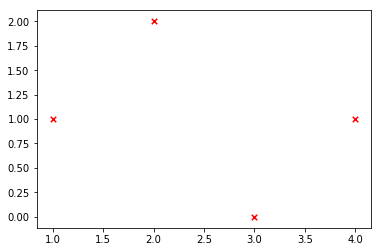

In [6]:
plt.scatter(points[:, 0], points[:, 1], c='red', s=30, marker='x');

In [8]:
import scipy
import scipy.special

nCr = scipy.special.comb

def bernstein_basis(i, n):
    """ Construct Bernstein basis polynomial given i - current point idx and n - number of points """
    return lambda t: nCr(n, i) * t ** i * (1 - t) ** (n - i)

def bezier_n(points):
    """ Generate bezier curve as a sum of Bernstein polynomials """
    n = points.shape[0]
    return lambda t: np.sum([bernstein_basis(i, n - 1)(t) * points[i] for i in range(len(points))], axis=0)

def plot_bezier(control_points, interpolated_points):
    plt.scatter(control_points[:, 0], control_points[:, 1],
                c='red', s=56, marker='+', label='Control Points')
    plt.plot(interpolated_points[:, 0], interpolated_points[:, 1], label="Bezier interpolation")
    plt.legend();

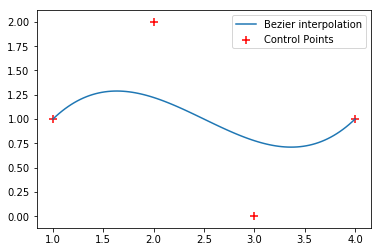

In [73]:
points = np.array([[1, 1],
                   [2, 2],
                   [3, 0],
                   [4, 1]])
b_n = bezier_n(points)
plot_bezier(points, np.apply_along_axis(b_n, 1, t[:, None]))

In [79]:
def control_points(knots):
    n = len(knots) - 1
    p1 = [0 for _ in range(n)]
    p2 = [0 for _ in range(n)]
    
    a, b, c, r = [], [], [], []
    
    a.append(0)
    b.append(2)
    c.append(1)
    r.append(knots[0] + 2 * knots[1])
    
    for i in range(1, n - 1):
        a.append(1)
        b.append(4)
        c.append(1)
        r.append(4 * knots[i] + 2 * knots[i + 1])
    
    a.append(2)
    b.append(7)
    c.append(0)
    r.append(8 * knots[n - 1] + knots[n])
    
    for i in range(1, n):
        m = a[i]/b[i-1]
        b[i] = b[i] - m * c[i - 1]
        r[i] = r[i] - m * r[i - 1]

    p1[n-1] = r[n-1]/b[n-1]
    
    for i in range(n-2, -1, -1):
        p1[i] = (r[i] - c[i] * p1[i + 1]) / b[i]
    
    for i in range(n-1):
        p2[i] = 2 * knots[i + 1] - p1[i + 1]
    
    p2[n - 1] = .5 * (knots[n] + p1[n - 1]) 
    return p1, p2

In [80]:
px, py = control_points(points)

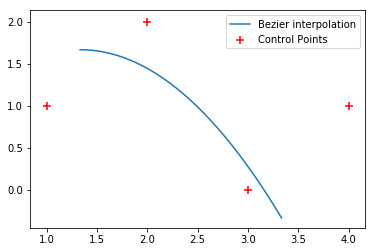

In [82]:
b_n = bezier_n(np.hstack((px, py)))
plot_bezier(points, np.apply_along_axis(b_n, 1, t[:, None]))

In [88]:
def pointInLine(a, b, t):
    ax, ay = a
    bx, by = b
    x = ax - ((ax - bx) * t)
    y = ay - ((ay - by) * t)
    return [x, y]

In [93]:
def pointInQuadCurve(p0, p1, p2, t):
    a = pointInLine(p0, p1, t)
    b = pointInLine(p1, p2, t)
    return pointInLine(a, b, t)

In [95]:
pred_points = np.array([ pointInQuadCurve(points[0], points[1], points[2], _) for _ in t])

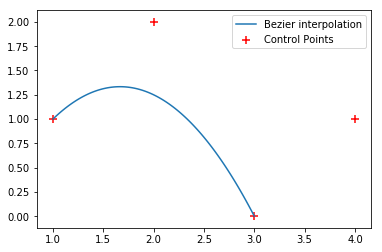

In [96]:
plot_bezier(points, pred_points)

In [97]:
M = np.array([[1, 0, 0, 0],
              [-3, 3, 0, 0],
              [3, -6, 3, 0],
              [-1, 3, -3, 1]])
M_inv = np.linalg.inv(M)

In [98]:
M_inv

array([[ 1.        , -0.        , -0.        , -0.        ],
       [ 1.        ,  0.33333333, -0.        , -0.        ],
       [ 1.        ,  0.66666667,  0.33333333,  0.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ]])

In [102]:
import sympy

In [103]:
M = sympy.Matrix(([1, 0, 0, 0], [-3, 3, 0, 0], [3, -6, 3, 0], [-1, 3, -3, 1]))

In [105]:
M_inv = M.inv()

In [108]:
M.inv()

Matrix([
[1,   0,   0, 0],
[1, 1/3,   0, 0],
[1, 2/3, 1/3, 0],
[1,   1,   1, 1]])

In [110]:
a = sympy.Symbol('a')
b = sympy.Symbol('b')
poly_m = sympy.Matrix(([1, 0, 0, 0], [1, a, a ** 2, a ** 3], [1, b, b ** 2, b ** 3], [1, 1, 1, 1]))

In [111]:
poly_m.inv()

Matrix([
[                                                                                                                                                                                      1,                                                                0,                                                                                                                                           0,                                                                                                                                                                     0],
[((-b**2 + 1)*(-(a**2 - a)*(b**3 - b) + (a**3 - a)*(b**2 - b)) - (-b**3 + b**2)*((a - 1)*(b**2 - b) - (a**2 - a)*(b - 1)))/((b**2 - b)*(-(a**2 - a)*(b**3 - b) + (a**3 - a)*(b**2 - b))), -(-b**3 + b**2)/(-(a**2 - a)*(b**3 - b) + (a**3 - a)*(b**2 - b)), (-(-a**2 + a)*(-b**3 + b**2) + (a**2 - a)*(b**3 - b) - (a**3 - a)*(b**2 - b))/((b**2 - b)*(-(a**2 - a)*(b**3 - b) + (a**3 - a)*(b**2 - b))), (b**2*(-(a**2 - a)*(b**3 - b) + (a**3

In [115]:
new_points = (M_inv @ poly_m.inv()).solve(points)

In [123]:
new_points[1]

1

In [125]:
A = np.array([[1, 0, 0, 0], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]])

In [127]:
M = np.array([[1, 0, 0, 0],
              [-3, 3, 0, 0],
              [3, -6, 3, 0],
              [-1, 3, -3, 1]])

In [130]:
np.linalg.inv(A)

LinAlgError: Singular matrix

In [128]:
np.linalg.inv(M) @ np.linalg.inv(A)

LinAlgError: Singular matrix